In [5]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from pprint import pprint 
import graphviz

%matplotlib inline
#Install pydot

#### so we define the state space as Scrolling, Chatting, or Watching. 
#### We will set the initial probabilities to 35%, 35%, and 30% respectively.

In [26]:
# create state space and initial state probabilities
states = ['Scrolling', 'Chatting', 'Watching']
pi = [0.35, 0.35, 0.3]
state_space = pd.Series(pi, index=states, name='states')
print(state_space)
print(state_space.sum())

Scrolling    0.35
Chatting     0.35
Watching     0.30
Name: states, dtype: float64
1.0


#### The next step is to define the transition probabilities. They are simply the probabilities of staying in the same state or moving to a different state given the current state. 

In [27]:
'''
Create transition matrix
Transition probability matrix of changing states given a state
Matrix is size (M x M) where M is number of states
'''

q_df = pd.DataFrame(columns=states, index=states)
q_df.loc[states[0]] = [0.4, 0.2, 0.4]
q_df.loc[states[1]] = [0.45, 0.45, 0.1]
q_df.loc[states[2]] = [0.45, 0.25, .3]

print(q_df)

q = q_df.values
print('\n', q, q.shape, '\n')
print(q_df.sum(axis=1))

          Scrolling Chatting Watching
Scrolling       0.4      0.2      0.4
Chatting       0.45     0.45      0.1
Watching       0.45     0.25      0.3

 [[0.4 0.2 0.4]
 [0.45 0.45 0.1]
 [0.45 0.25 0.3]] (3, 3) 

Scrolling    1.0
Chatting     1.0
Watching     1.0
dtype: float64


In [28]:
'''
Create a function that maps transition probability dataframe to markov edges and weights.
'''

def _get_markov_edges(Q):
    edges = {}
    for col in Q.columns:
        for idx in Q.index:
            edges[(idx,col)] = Q.loc[idx,col]
    return edges

edges_wts = _get_markov_edges(q_df)
pprint(edges_wts)

{('Chatting', 'Chatting'): 0.45,
 ('Chatting', 'Scrolling'): 0.45,
 ('Chatting', 'Watching'): 0.1,
 ('Scrolling', 'Chatting'): 0.2,
 ('Scrolling', 'Scrolling'): 0.4,
 ('Scrolling', 'Watching'): 0.4,
 ('Watching', 'Chatting'): 0.25,
 ('Watching', 'Scrolling'): 0.45,
 ('Watching', 'Watching'): 0.3}


Nodes:
['Scrolling', 'Chatting', 'Watching']

Edges:
OutMultiEdgeDataView([('Scrolling', 'Scrolling', {'weight': 0.4, 'label': 0.4}), ('Scrolling', 'Chatting', {'weight': 0.2, 'label': 0.2}), ('Scrolling', 'Watching', {'weight': 0.4, 'label': 0.4}), ('Chatting', 'Scrolling', {'weight': 0.45, 'label': 0.45}), ('Chatting', 'Chatting', {'weight': 0.45, 'label': 0.45}), ('Chatting', 'Watching', {'weight': 0.1, 'label': 0.1}), ('Watching', 'Scrolling', {'weight': 0.45, 'label': 0.45}), ('Watching', 'Chatting', {'weight': 0.25, 'label': 0.25}), ('Watching', 'Watching', {'weight': 0.3, 'label': 0.3})])


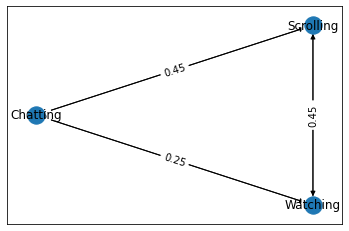

In [29]:
'''
Networkx creates Graphs that consist of nodes and edges. 
In our toy example the users's possible states are the nodes and the edges are the lines that connect the nodes. 
The transition probabilities are the weights. 
They represent the probability of transitioning to a state given the current state.
'''
# create graph object
G = nx.MultiDiGraph()

# nodes correspond to states
G.add_nodes_from(states)
print(f'Nodes:\n{G.nodes()}\n')

# edges represent transition probabilities
for k, v in edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)
print(f'Edges:')
pprint(G.edges(data=True))    

pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='dot')
nx.draw_networkx(G, pos)

# create edge labels for jupyter plot but is not necessary
edge_labels = {(n1,n2):d['label'] for n1,n2,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G , pos, edge_labels=edge_labels)
nx.drawing.nx_pydot.write_dot(G, 'social_media_activity.dot') ##Requires a .dot viewer

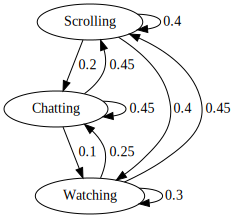

In [51]:
with open("social_media_activity.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

####  If you follow the edges from any node, it will tell you the probability that the user will transition to another state. For example, if the user is scrolling, we can see there is a 40% chance the user will keep sleeping, a 40% chance the user will stop and watch, and a 20% chance the dog will stop and chat. 

In [52]:
'''
In this situation the true state of the user is unknown, thus hidden from you. 
One way to model this is to assume that the user has observable behaviors that represent the true, hidden state.
First we create our state space - Happy, Sad or Bored. We assume they are equiprobable.
'''

hidden_states = ['Happy', 'Sad', 'Bored']
pi = [0.3, 0.4, 0.3 ]
state_space = pd.Series(pi, index=hidden_states, name='states')
print(state_space)
print('\n', state_space.sum())

Happy    0.3
Sad      0.4
Bored    0.3
Name: states, dtype: float64

 1.0


In [53]:
'''
Create hidden transition matrix
a or alpha = transition probability matrix of changing states given a state
Matrix is size (M x M) where M is number of states
'''

a_df = pd.DataFrame(columns=hidden_states, index=hidden_states)
a_df.loc[hidden_states[0]] = [0.23, 0.61, 0.16]
a_df.loc[hidden_states[1]] = [0.41, 0.38, 0.21]
a_df.loc[hidden_states[2]] = [0.34, 0.24, 0.42]

print(a_df)

a = a_df.values
print('\n', a, a.shape, '\n')
print(a_df.sum(axis=1))

      Happy   Sad Bored
Happy  0.23  0.61  0.16
Sad    0.41  0.38  0.21
Bored  0.34  0.24  0.42

 [[0.23 0.61 0.16]
 [0.41 0.38 0.21]
 [0.34 0.24 0.42]] (3, 3) 

Happy    1.0
Sad      1.0
Bored    1.0
dtype: float64


#### Now we create the emission or observation probability matrix. This matrix is size M x O where M is the number of hidden states and O is the number of possible observable states. The emission matrix tells us the probability the user is in one of the hidden states, given the current, observable state. 

#### Let's keep the same observable states from the previous example. The user can be either scrolling, chatting, or watching. For now we make our best guess to fill in the probabilities. 

In [54]:
observable_states = states

b_df = pd.DataFrame(columns=observable_states, index=hidden_states)
b_df.loc[hidden_states[0]] = [0.2, 0.6, 0.2]
b_df.loc[hidden_states[1]] = [0.4, 0.1, 0.5]
b_df.loc[hidden_states[2]] = [0.3, 0.5, 0.2]

print(b_df)

b = b_df.values
print('\n', b, b.shape, '\n')
print(b_df.sum(axis=1))

      Scrolling Chatting Watching
Happy       0.2      0.6      0.2
Sad         0.4      0.1      0.5
Bored       0.3      0.5      0.2

 [[0.2 0.6 0.2]
 [0.4 0.1 0.5]
 [0.3 0.5 0.2]] (3, 3) 

Happy    1.0
Sad      1.0
Bored    1.0
dtype: float64


In [56]:
hide_edges_wts = _get_markov_edges(a_df)
pprint(hide_edges_wts)

emit_edges_wts = _get_markov_edges(b_df)
pprint(emit_edges_wts)

{('Bored', 'Bored'): 0.42,
 ('Bored', 'Happy'): 0.34,
 ('Bored', 'Sad'): 0.24,
 ('Happy', 'Bored'): 0.16,
 ('Happy', 'Happy'): 0.23,
 ('Happy', 'Sad'): 0.61,
 ('Sad', 'Bored'): 0.21,
 ('Sad', 'Happy'): 0.41,
 ('Sad', 'Sad'): 0.38}
{('Bored', 'Chatting'): 0.5,
 ('Bored', 'Scrolling'): 0.3,
 ('Bored', 'Watching'): 0.2,
 ('Happy', 'Chatting'): 0.6,
 ('Happy', 'Scrolling'): 0.2,
 ('Happy', 'Watching'): 0.2,
 ('Sad', 'Chatting'): 0.1,
 ('Sad', 'Scrolling'): 0.4,
 ('Sad', 'Watching'): 0.5}


Nodes:
['Happy', 'Sad', 'Bored']

Edges:
OutMultiEdgeDataView([('Happy', 'Happy', {'weight': 0.23, 'label': 0.23}), ('Happy', 'Sad', {'weight': 0.61, 'label': 0.61}), ('Happy', 'Bored', {'weight': 0.16, 'label': 0.16}), ('Happy', 'Scrolling', {'weight': 0.2, 'label': 0.2}), ('Happy', 'Chatting', {'weight': 0.6, 'label': 0.6}), ('Happy', 'Watching', {'weight': 0.2, 'label': 0.2}), ('Sad', 'Happy', {'weight': 0.41, 'label': 0.41}), ('Sad', 'Sad', {'weight': 0.38, 'label': 0.38}), ('Sad', 'Bored', {'weight': 0.21, 'label': 0.21}), ('Sad', 'Scrolling', {'weight': 0.4, 'label': 0.4}), ('Sad', 'Chatting', {'weight': 0.1, 'label': 0.1}), ('Sad', 'Watching', {'weight': 0.5, 'label': 0.5}), ('Bored', 'Happy', {'weight': 0.34, 'label': 0.34}), ('Bored', 'Sad', {'weight': 0.24, 'label': 0.24}), ('Bored', 'Bored', {'weight': 0.42, 'label': 0.42}), ('Bored', 'Scrolling', {'weight': 0.3, 'label': 0.3}), ('Bored', 'Chatting', {'weight': 0.5, 'label': 0.5}), ('Bored', 'Watching', {'weight': 0.2, 'labe

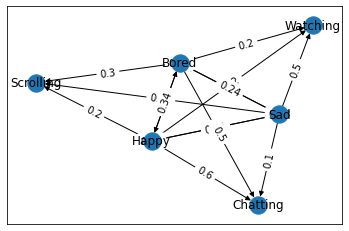

In [57]:
# create graph object
G = nx.MultiDiGraph()

# nodes correspond to states
G.add_nodes_from(hidden_states)
print(f'Nodes:\n{G.nodes()}\n')

# edges represent hidden probabilities
for k, v in hide_edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)

# edges represent emission probabilities
for k, v in emit_edges_wts.items():
    tmp_origin, tmp_destination = k[0], k[1]
    G.add_edge(tmp_origin, tmp_destination, weight=v, label=v)
    
print(f'Edges:')
pprint(G.edges(data=True))    

pos = nx.drawing.nx_pydot.graphviz_layout(G, prog='neato')
nx.draw_networkx(G, pos)

# create edge labels for jupyter plot but is not necessary
emit_edge_labels = {(n1,n2):d['label'] for n1,n2,d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G , pos, edge_labels=emit_edge_labels)
nx.drawing.nx_pydot.write_dot(G, 'Social_Media_app_activity.dot')

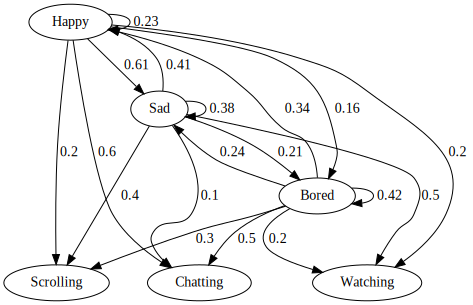

In [58]:
with open("Social_Media_app_activity.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

#### The hidden Markov graph is a little more complex but the principles are the same. For example, you would expect that if your user is chatting there is a high probability that it is Happy (60%) and a very low probability that the user is Sad (10%).

In [59]:
'''
What if you needed to discern the emotion of your user over time given a sequence of observations?  
'''

obs_map = {'Scrolling':0, 'Chatting':1, 'Watching':2}
obs = np.array([1,1,2,1,0,1,2,1,0,2,2,0,1,0,1])

inv_obs_map = dict((v,k) for k, v in obs_map.items())
obs_seq = [inv_obs_map[v] for v in list(obs)]

print( pd.DataFrame(np.column_stack([obs, obs_seq]), 
                columns=['Obs_code', 'Obs_seq']) )

   Obs_code    Obs_seq
0         1   Chatting
1         1   Chatting
2         2   Watching
3         1   Chatting
4         0  Scrolling
5         1   Chatting
6         2   Watching
7         1   Chatting
8         0  Scrolling
9         2   Watching
10        2   Watching
11        0  Scrolling
12        1   Chatting
13        0  Scrolling
14        1   Chatting


#### Using the Viterbi algorithm we can identify the most likely sequence of hidden states given the sequence of observations.

#### High level, the Viterbi algorithm increments over each time step, finding the maximum probability of any path that gets to state i at time t, that also has the correct observations for the sequence up to time t.

#### The algorithm also keeps track of the state with the highest probability at each stage. At the end of the sequence, the algorithm will iterate backwards selecting the state that "won" each time step, and thus creating the most likely path, or likely sequence of hidden states that led to the sequence of observations.

In [47]:
'''
code adapted from Stephen Marsland's, Machine Learning An Algorthmic Perspective, Vol. 2
https://github.com/alexsosn/MarslandMLAlgo/blob/master/Ch16/HMM.py
'''

def viterbi(pi, a, b, obs):
    
    nStates = np.shape(b)[0]
    T = np.shape(obs)[0]
    
    # init blank path
    path = np.zeros(T,dtype=int)
    # delta --> highest probability of any path that reaches state i
    delta = np.zeros((nStates, T))
    # phi --> argmax by time step for each state
    phi = np.zeros((nStates, T))
    
    # init delta and phi 
    delta[:, 0] = pi * b[:, obs[0]]
    phi[:, 0] = 0

    print('\nStart Walk Forward\n')    
    # the forward algorithm extension
    for t in range(1, T):
        for s in range(nStates):
            delta[s, t] = np.max(delta[:, t-1] * a[:, s]) * b[s, obs[t]] 
            phi[s, t] = np.argmax(delta[:, t-1] * a[:, s])
            print('s={s} and t={t}: phi[{s}, {t}] = {phi}'.format(s=s, t=t, phi=phi[s, t]))
    
    # find optimal path
    print('-'*50)
    print('Start Backtrace\n')
    path[T-1] = np.argmax(delta[:, T-1])
    #p('init path\n    t={} path[{}-1]={}\n'.format(T-1, T, path[T-1]))
    for t in range(T-2, -1, -1):
        path[t] = phi[path[t+1], [t+1]]
        #p(' '*4 + 't={t}, path[{t}+1]={path}, [{t}+1]={i}'.format(t=t, path=path[t+1], i=[t+1]))
        print('path[{}] = {}'.format(t, path[t]))
        
    return path, delta, phi

path, delta, phi = viterbi(pi, a, b, obs)
print('\nsingle best state path: \n', path)
print('delta:\n', delta)
print('phi:\n', phi)


Start Walk Forward

s=0 and t=1: phi[0, 1] = 2.0
s=1 and t=1: phi[1, 1] = 0.0
s=2 and t=1: phi[2, 1] = 2.0
s=0 and t=2: phi[0, 2] = 2.0
s=1 and t=2: phi[1, 2] = 0.0
s=2 and t=2: phi[2, 2] = 2.0
s=0 and t=3: phi[0, 3] = 1.0
s=1 and t=3: phi[1, 3] = 1.0
s=2 and t=3: phi[2, 3] = 1.0
s=0 and t=4: phi[0, 4] = 0.0
s=1 and t=4: phi[1, 4] = 0.0
s=2 and t=4: phi[2, 4] = 2.0
s=0 and t=5: phi[0, 5] = 1.0
s=1 and t=5: phi[1, 5] = 1.0
s=2 and t=5: phi[2, 5] = 1.0
s=0 and t=6: phi[0, 6] = 0.0
s=1 and t=6: phi[1, 6] = 0.0
s=2 and t=6: phi[2, 6] = 2.0
s=0 and t=7: phi[0, 7] = 1.0
s=1 and t=7: phi[1, 7] = 1.0
s=2 and t=7: phi[2, 7] = 1.0
s=0 and t=8: phi[0, 8] = 0.0
s=1 and t=8: phi[1, 8] = 0.0
s=2 and t=8: phi[2, 8] = 2.0
s=0 and t=9: phi[0, 9] = 1.0
s=1 and t=9: phi[1, 9] = 1.0
s=2 and t=9: phi[2, 9] = 1.0
s=0 and t=10: phi[0, 10] = 1.0
s=1 and t=10: phi[1, 10] = 1.0
s=2 and t=10: phi[2, 10] = 1.0
s=0 and t=11: phi[0, 11] = 1.0
s=1 and t=11: phi[1, 11] = 1.0
s=2 and t=11: phi[2, 11] = 1.0
s=0 and t=

In [48]:
state_map = {0:'Instagram', 1:'Facebook', 2:'Twitter'}
state_path = [state_map[v] for v in path]

(pd.DataFrame()
 .assign(Observation=obs_seq)
 .assign(Best_Path=state_path))

,Observation,Best_Path
0,Chatting,Twitter
1,Chatting,Instagram
2,Watching,Facebook
3,Chatting,Instagram
4,Scrolling,Facebook
5,Chatting,Instagram
6,Watching,Facebook
7,Chatting,Instagram
8,Scrolling,Facebook
9,Watching,Facebook
